### Practice 5

In [29]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df = pd.read_csv("Stress.csv")

In [31]:
df.head(10)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,1,1.0,1517274027
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,0,0.8,1512854409
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,1,0.8,1483582174
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,1,0.6,1514843984
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1,1.0,1490428087


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [33]:
df.dtypes

subreddit            object
post_id              object
sentence_range       object
text                 object
label                 int64
confidence          float64
social_timestamp      int64
dtype: object

In [34]:
df.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


<AxesSubplot:>

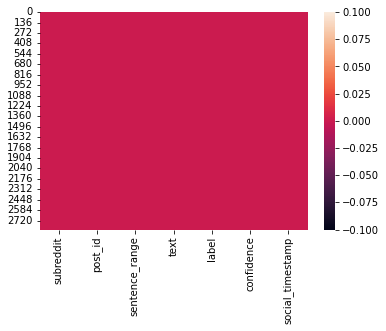

In [35]:
sb.heatmap(df.isnull())

<AxesSubplot:xlabel='label', ylabel='count'>

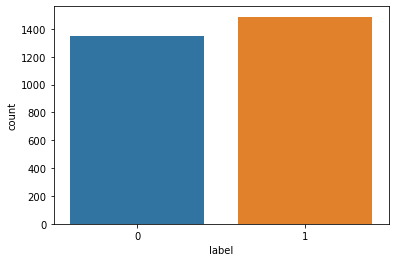

In [36]:
sb.countplot(x= 'label', data = df )

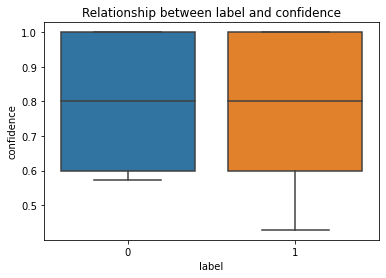

In [37]:

sb.boxplot(x='label', y='confidence', data=df)
plt.title('Relationship between label and confidence')
plt.show()

In [38]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

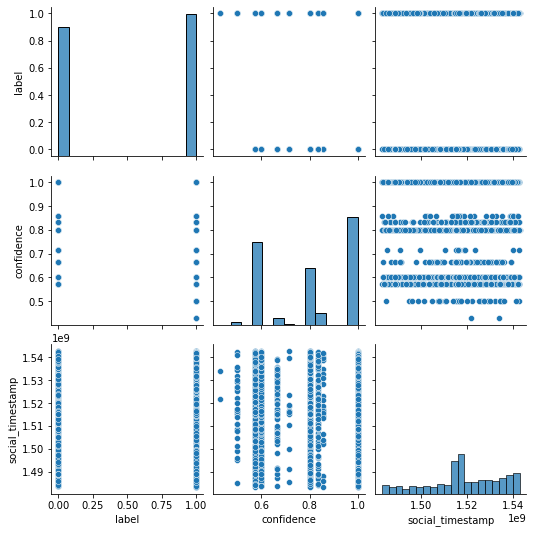

In [39]:
sb.pairplot(df)

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [41]:
df = pd.get_dummies(df, columns= ['text','subreddit'])
df.head(15)

,post_id,sentence_range,label,confidence,social_timestamp,"text_\tIt was the summer, I had just started a new job as a bartender. I met a girl that was equally odd, had a lot of similar interests, was looking for the same thing I was. We quickly became enamored with each other. It didn't take long for us to move in together. I started finding projects around the house to fix up, she would surprise me with home cooked meals or a note gushing over our relationship.","text_ She resents my relationship with our son - My son is a Daddy's boy. Even now as I type this I hear him out there waiting for me saying Daddy Daddy Daddy. He comes and gives me hugs when I come home and barely notices when my wife is gone or comes home. - ‎This is also something she's recently admitted and I feel guilty about it, but I feel like it's because she puts in no effort beyond what she needs to do.","text_ He grew from a short, stubby, orange haired, freckle faced, awkward boy into a seemingly strong, tattooed, pierced, tall, ginger, man I thought I always wanted. From the time I was 13, I thought he loved me. I didn't know why, but he told me often; on the phone, through letter. I was the girl he thought he could never get. I was out of his league (his words).","text_ When we had our first fight I did EVERYTHING I could to gain her back in my life. I quit smoking cigarettes because she went on a ""I hate all drugs and anything smokable"" rant. I tried to be more mindful and kind because she said I was the opposite. I tried to change because I wanted my best friend back. 4 months later she let me back in and I was so fucking happy.","text_ **tl;dr**: I've [18 F] been into my friend [18 M] for nearly two years, and he's about to go out on a date with my best friend [18 F]. I don't know how to handle my feelings about their developing romantic relationship. Also, he's trying to set me up with his best friend [19 M], and I don't know what to do about that. Thanks to anyone who may be able to offer some advice.",...,subreddit_almosthomeless,subreddit_anxiety,subreddit_assistance,subreddit_domesticviolence,subreddit_food_pantry,subreddit_homeless,subreddit_ptsd,subreddit_relationships,subreddit_stress,subreddit_survivorsofabuse
0,8601tu,"(15, 20)",1,0.800000,1521614353,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,8lbrx9,"(0, 5)",0,1.000000,1527009817,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,9ch1zh,"(15, 20)",1,0.800000,1535935605,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7rorpp,"[5, 10]",1,0.600000,1516429555,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9p2gbc,"[0, 5]",1,0.800000,1539809005,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,7tx7et,"(30, 35)",1,1.000000,1517274027,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7iphly,"[25, 30]",0,0.800000,1512854409,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,5m3k80,"(5, 10)",1,0.800000,1483582174,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,7nhy1v,"(50, 55)",1,0.600000,1514843984,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,61eiq6,"[15, 20]",1,1.000000,1490428087,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
def sentence(value):
    if "(" in str(value) and ")" in str(value):
        value = str(value).split("(")[1].split(")")[0]
    if "[" in value and "]" in value:
        value = value.split("[")[1].split("]")[0]
    return value.split(",")[1]



In [43]:
df["sentence_range"]= df["sentence_range"].apply(sentence)

df["sentence_range"]= df["sentence_range"].astype("float")

In [44]:
df.head()

,post_id,sentence_range,label,confidence,social_timestamp,"text_\tIt was the summer, I had just started a new job as a bartender. I met a girl that was equally odd, had a lot of similar interests, was looking for the same thing I was. We quickly became enamored with each other. It didn't take long for us to move in together. I started finding projects around the house to fix up, she would surprise me with home cooked meals or a note gushing over our relationship.","text_ She resents my relationship with our son - My son is a Daddy's boy. Even now as I type this I hear him out there waiting for me saying Daddy Daddy Daddy. He comes and gives me hugs when I come home and barely notices when my wife is gone or comes home. - ‎This is also something she's recently admitted and I feel guilty about it, but I feel like it's because she puts in no effort beyond what she needs to do.","text_ He grew from a short, stubby, orange haired, freckle faced, awkward boy into a seemingly strong, tattooed, pierced, tall, ginger, man I thought I always wanted. From the time I was 13, I thought he loved me. I didn't know why, but he told me often; on the phone, through letter. I was the girl he thought he could never get. I was out of his league (his words).","text_ When we had our first fight I did EVERYTHING I could to gain her back in my life. I quit smoking cigarettes because she went on a ""I hate all drugs and anything smokable"" rant. I tried to be more mindful and kind because she said I was the opposite. I tried to change because I wanted my best friend back. 4 months later she let me back in and I was so fucking happy.","text_ **tl;dr**: I've [18 F] been into my friend [18 M] for nearly two years, and he's about to go out on a date with my best friend [18 F]. I don't know how to handle my feelings about their developing romantic relationship. Also, he's trying to set me up with his best friend [19 M], and I don't know what to do about that. Thanks to anyone who may be able to offer some advice.",...,subreddit_almosthomeless,subreddit_anxiety,subreddit_assistance,subreddit_domesticviolence,subreddit_food_pantry,subreddit_homeless,subreddit_ptsd,subreddit_relationships,subreddit_stress,subreddit_survivorsofabuse
0,8601tu,20.0,1,0.8,1521614353,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,8lbrx9,5.0,0,1.0,1527009817,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,9ch1zh,20.0,1,0.8,1535935605,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7rorpp,10.0,1,0.6,1516429555,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9p2gbc,5.0,1,0.8,1539809005,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
df.drop(['post_id'], axis= 1, inplace = True)

In [46]:
# Split the data into training and testing sets
X = df.drop(['label'], axis=1)
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [48]:
lr_preds = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)

print("Linear Regression RMSE:", lr_rmse)

Linear Regression RMSE: 0.7842819339120677


In [49]:
ridge_m = Ridge(alpha=1.0)
ridge_m.fit(X_train, y_train)

/Users/arnoldsomuah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Ridge()

In [51]:
ridge_preds = ridge_m.predict(X_test)
ridge_rmse = mean_squared_error(y_test, ridge_preds, squared=False)
print("Ridge Regression RMSE:", ridge_rmse)

Ridge Regression RMSE: 0.49655540460250397


In [52]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [53]:
lasso_preds = lasso_model.predict(X_test)
lasso_rmse = mean_squared_error(y_test, lasso_preds, squared=False)
print("Lasso Regression RMSE:", lasso_rmse)

Lasso Regression RMSE: 0.4995244001764906
